In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Paramètres de connexion à la base de données
dbname = "LeagueBet"
user = "Ivan"
password = "r6sOtXPV5ugzD4q9958"
host = "bdd.ilovebeemo.com"
port = 35475



In [2]:
# Fonction pour ajouter une image en tant qu'étiquette
def add_image(ax, filepath, x, y, zoom):
    img = plt.imread(filepath)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
    ax.add_artist(ab)

C:\Users\yifor\AppData\Local\Temp\ipykernel_15100\376343254.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


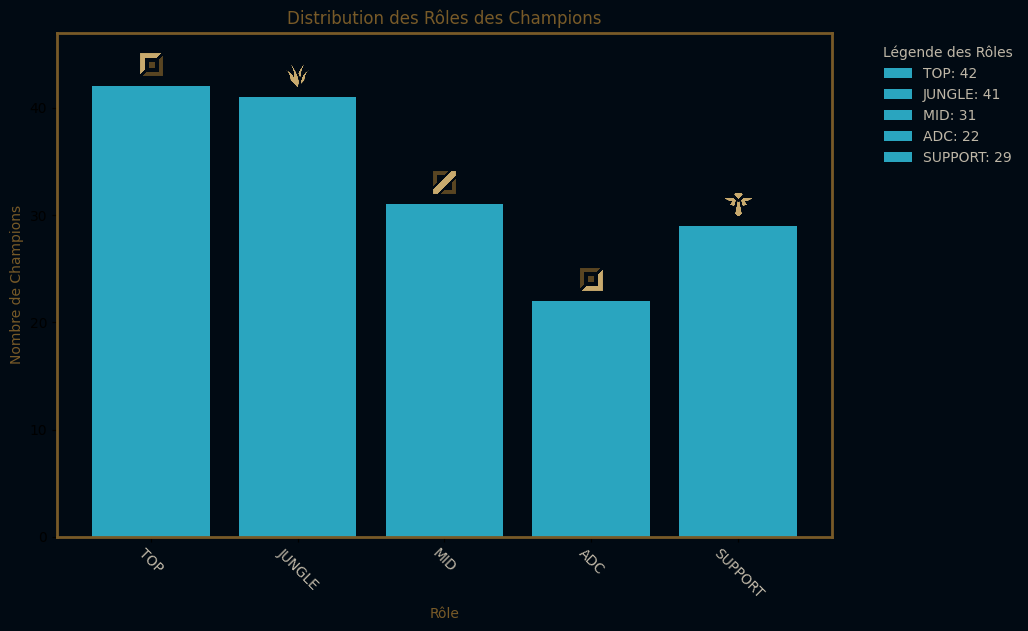

In [14]:
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Requête pour sélectionner les rôles et les noms des champions
query = "SELECT name, role FROM champions"

# Exécution de la requête et récupération des données
df = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()

# Regroupement des données par rôle
role_counts = df['role'].value_counts()


# Dictionnaire de traduction des rôles
translations = {
    "TOP": "TOP",
    "JUNGLE": "JUNGLE",
    "MIDDLE": "MID",
    "BOTTOM": "ADC",
    "UTILITY": "SUPPORT",
}

# Appliquer la traduction
role_counts.index = role_counts.index.map(translations)

# Définir l'ordre souhaité
desired_order = ["TOP", "JUNGLE", "MID", "ADC", "SUPPORT"]

images = {
    "TOP": "img/top.png",
    "JUNGLE": "img/jgl.png",
    "MID": "img/mid.png",
    "ADC": "img/adc.png",
    "SUPPORT": "img/supp.png",
}

# Réorganiser role_counts selon l'ordre souhaité
ordered_role_counts = role_counts.reindex(desired_order)

# Création du graphique avec une seule couleur pour toutes les barres
fig, ax = plt.subplots(figsize=(10, 6))

# Définir la couleur pour toutes les barres
bar_color = "#2AA5BF"  # Remplacez par la couleur de votre choix

for role in desired_order:
    role_count = ordered_role_counts[role]
    ax.bar(role, role_count, color=bar_color, label=f"{role}: {role_count}")

# Définir une couleur de fond pour le graphique et la zone de traçage
fig.patch.set_facecolor('#010A13')  # Couleur de fond du graphique
ax.set_facecolor('#010A13')         # Couleur de fond de la zone de traçage

# Ajouter des images au-dessus de chaque barre
image_height = 2  # Hauteur de l'image (peut être ajustée)


for i, role in enumerate(desired_order):
    role_count = ordered_role_counts[role]
    y = role_count + image_height  # Ajouter un espace au-dessus
    add_image(ax, images[role], i, y, zoom=0.15)

# Trouver la valeur maximale dans ordered_role_counts
max_value = ordered_role_counts.max()

# Augmenter légèrement la limite supérieure
upper_limit = max_value + 5  # Vous pouvez ajuster la valeur ajoutée selon vos besoins

# Appliquer la nouvelle limite à l'axe des y
ax.set_ylim(0, upper_limit)

# Personnalisation des bordures du graphique
for spine in ax.spines.values():
    spine.set_edgecolor('#785A28')  # Choisir la couleur de la bordure
    spine.set_linewidth(2)       # Choisir l'épaisseur de la bordure

legend = plt.legend(title="Légende des Rôles", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


plt.title('Distribution des Rôles des Champions', color='#785A28')
plt.xlabel('Rôle', color='#785A28')
plt.ylabel('Nombre de Champions', color='#785A28')
plt.xticks(rotation=-45, color='#BFB7A7')
plt.setp(legend.get_title(), color='#BFB7A7')
plt.setp(legend.get_texts(), color='#BFB7A7')


# Ajuster la marge supérieure sans affecter la position des éléments
plt.subplots_adjust(top=0.95)  # Vous pouvez ajuster la valeur top selon vos besoins

plt.show()


C:\Users\yifor\AppData\Local\Temp\ipykernel_15120\1214117373.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


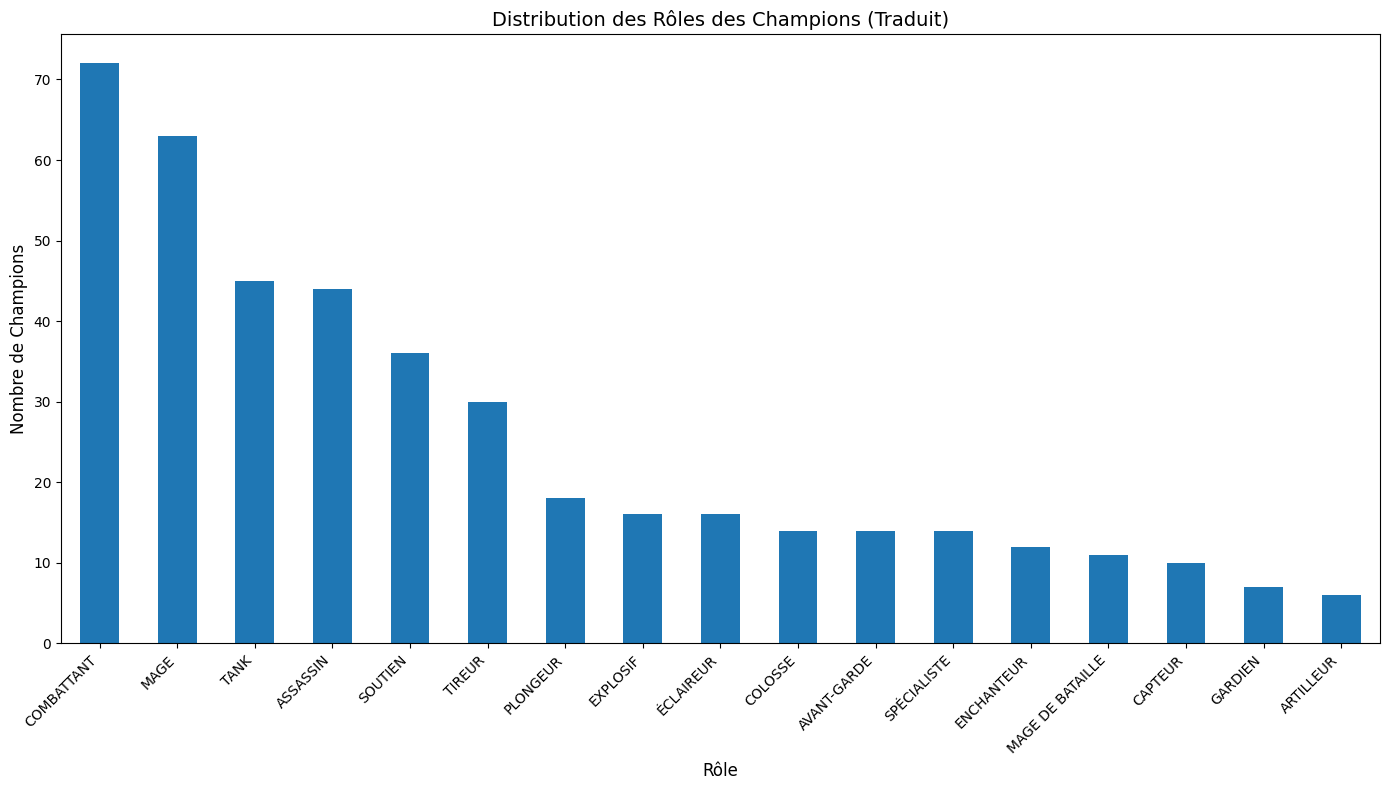

In [12]:
# Connexion à la base de données
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Requête pour sélectionner les rôles et les noms des champions
query = "SELECT name, roles FROM champions"

# Exécution de la requête et récupération des données
df = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()


# S'assurer que 'roles' est une liste (si ce n'est pas déjà le cas)
df['roles'] = df['roles'].apply(lambda x: x if isinstance(x, list) else [x])

# Séparation des rôles en lignes distinctes
roles_exploded = df['roles'].explode()

# Compter les occurrences de chaque rôle
role_counts = roles_exploded.value_counts()

# Dictionnaire de traduction des rôles
translations = {
    "FIGHTER": "COMBATTANT",
    "JUGGERNAUT": "COLOSSE",
    "TANK": "TANK",
    "ASSASSIN": "ASSASSIN",
    "BURST": "EXPLOSIF",
    "MAGE": "MAGE",
    "MARKSMAN": "TIREUR",
    "BATTLEMAGE": "MAGE DE BATAILLE",
    "ARTILLERY": "ARTILLEUR",
    "SPECIALIST": "SPÉCIALISTE",
    "SUPPORT": "SOUTIEN",
    "CATCHER": "CAPTEUR",
    "DIVER": "PLONGEUR",
    "SKIRMISHER": "ÉCLAIREUR",
    "VANGUARD": "AVANT-GARDE",
    "ENCHANTER": "ENCHANTEUR",
    "WARDEN": "GARDIEN"
}

# Appliquer la traduction
role_counts.index = role_counts.index.map(translations)


# Création du graphique
plt.figure(figsize=(14, 8))  # Taille plus grande pour une meilleure lisibilité
role_counts.plot(kind='bar')
plt.title('Distribution des Rôles des Champions (Traduit)', fontsize=14)
plt.xlabel('Rôle', fontsize=12)
plt.ylabel('Nombre de Champions', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation et alignement des étiquettes
plt.tight_layout()  # Optimisation de l'espace
plt.show()
